# 당뇨 수치 예측하기

## Step 1. 데이터 가져오기

In [1]:
from sklearn.datasets import load_diabetes
# sklearn.datasets의 load_diabetes에서 데이터 가져오기

diabetes = load_diabetes() 
# 로드된 diabetes 데이터셋을 diabetes라는 변수에 저장

print(dir(diabetes))

['DESCR', 'data', 'data_filename', 'data_module', 'feature_names', 'frame', 'target', 'target_filename']


In [2]:
df_X = diabetes.data # df_X에 diabetes의 data 저장
df_X.shape
# 442개의 행과 10개의 열(feature)로 구성

(442, 10)

In [3]:
df_y = diabetes.target # df_y에 target 저장
df_y.shape

(442,)

In [4]:
import pandas as pd

diabetes_df = pd.DataFrame(data=df_X, columns=diabetes.feature_names)

diabetes_df # 당뇨병 수치 데이터프레임 확인

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


age나 sex 등 숫자가 이상해서 제대로 데이터를 가지고 온건지 의문이 들었다.  
찾아본 결과 사이킷런 사이트에 따르면 이렇게 숫자가 나오는 것은 모든 특성을 -0.2~0.2 사이에 분포하도록 조정했기 때문이다.

## Step 2. 모델에 입력할 데이터 X 준비하기

In [5]:
import numpy as np

np.array(df_X) # df_X에 있는 값들을 numpy array로 변환해서 저장

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

## Step 3. 모델에 예측할 데이터 y 준비하기

In [6]:
np.array(df_y) # df_y에 있는 값들을 numpy array로 변환해서 저장

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

## Step 4. train 데이터와 test 데이터로 분리하기

In [7]:
from sklearn.model_selection import train_test_split

df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=33)
# df_X와 df_y 데이터를 각각 train:test = 8:2 비율로 데이터로 분리

print(df_X_train.shape, df_y_train.shape)
print(df_X_test.shape, df_y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


## Step 5. 모델 준비하기

In [8]:
W = np.random.rand(10)
b = np.random.rand()

In [18]:
W # 입력 데이터 개수에 맞는 가중치 W 준비

array([ 2.47325547, -1.70033358, 15.03440916,  9.50503335,  5.27804544,
        5.27000265, -9.08471893, 10.96222411, 13.07929095,  8.87208327])

In [19]:
b # 입력 데이터 개수에 맞는 b 준비

28.59519787267577

In [20]:
# 모델 함수 구현하기
def model(df_X, W, b):
    predictions = 0
    for i in range(10):
        predictions += df_X[:, i] * W[i]
    predictions += b
    return predictions # y = W1*X1 + W2*X2 + ... + Wi*Xi +b

## Step 6. 손실함수 loss 정의하기

In [21]:
def MSE(a, b): # MSE 함수 정의 : 두 값 차이의 제곱의 평균
    mse = ((a-b) ** 2).mean()
    return mse

In [22]:
def loss(df_X, W, b, df_y): # 손실함수 loss 정의하기_손실함수를 MSE 함수로 정의
    predictions = model(df_X, W, b)
    L = MSE(predictions, df_y)
    return L

## Step 7. 기울기를 구하는 gradient 함수 구현하기

In [23]:
def gradient(df_X, W, b, df_y):
    N = len(W) # N은 가중치의 개수
    
    df_y_pred = model(df_X, W, b) # y_pred 준비
    
    dW = 1/N * 2 * df_X.T.dot(df_y_pred - df_y) # 공식에 맞게 gradient 계산
    
    db = 2 * (df_y_pred - df_y).mean() # b의 gradient 계산
    return dW, db

In [24]:
dW, db = gradient(df_X, W, b, df_y)
print("dW:", dW)
print("db:", db)

dW: [ -56.87404521  -11.1079551  -182.09747989 -136.71110776  -62.29998156
  -50.00642264  121.36099795 -130.49606254 -174.65633622 -116.80310974]
db: -247.07657258044034


## Step 8. 하이퍼 파라미터인 학습률 설정하기

In [27]:
LEARNING_RATE = 0.001

## Step 9. 모델 학습하기

In [34]:
losses = []

for i in range(1, 5001):
    dW, db = gradient(df_X_train, W, b, df_y_train) # 정의된 기울기 함수로 모델 학습
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(df_X_train, W, b, df_y_train) # 정의된 손실함수로 모델 학습
    losses.append(L)
    if i % 50 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 50 : Loss 2952.9430
Iteration 100 : Loss 2952.6810
Iteration 150 : Loss 2952.4225
Iteration 200 : Loss 2952.1673
Iteration 250 : Loss 2951.9155
Iteration 300 : Loss 2951.6669
Iteration 350 : Loss 2951.4216
Iteration 400 : Loss 2951.1794
Iteration 450 : Loss 2950.9404
Iteration 500 : Loss 2950.7045
Iteration 550 : Loss 2950.4717
Iteration 600 : Loss 2950.2418
Iteration 650 : Loss 2950.0149
Iteration 700 : Loss 2949.7910
Iteration 750 : Loss 2949.5699
Iteration 800 : Loss 2949.3516
Iteration 850 : Loss 2949.1361
Iteration 900 : Loss 2948.9234
Iteration 950 : Loss 2948.7134
Iteration 1000 : Loss 2948.5061
Iteration 1050 : Loss 2948.3014
Iteration 1100 : Loss 2948.0993
Iteration 1150 : Loss 2947.8998
Iteration 1200 : Loss 2947.7028
Iteration 1250 : Loss 2947.5083
Iteration 1300 : Loss 2947.3162
Iteration 1350 : Loss 2947.1266
Iteration 1400 : Loss 2946.9393
Iteration 1450 : Loss 2946.7544
Iteration 1500 : Loss 2946.5718
Iteration 1550 : Loss 2946.3915
Iteration 1600 : Loss 2946.2

#### Learning rate를 다르게 설정해보고 계속해서 학습을 진행했을 때 나온 결과들
1. learning rate = 0.0001 / range(1,1001) / 10의 배수 -> loss=15983.5267
2. learning rate = 0.001 / range(1,1001) / 10의 배수 -> loss=4415.2812
3. learning rate = 0.001 / range(1,1001) / 50의 배수 -> loss=3702.6767
4. learning rate = 0.001 / range(1,2001) / 50의 배수 -> loss=3290.4403 
5. learning rate = 0.001 / range(1,2001) / 100의 배수 -> loss=3122.0635 

loss 값이 큰 이유는 상대적으로 x값들에 비해 y값이 매우 크기 때문이다.  
W와 b 두 수가 바뀌면 같은 학습률과 범위와 배수를 사용해도 값이 바뀌는 경우가 있었다.

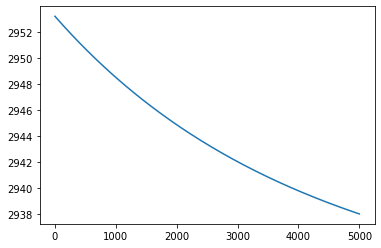

In [35]:
import matplotlib.pyplot as plt
plt.plot(losses)

LMS에서는 matplotlib을 사용하면 y축이 모든 loss 값이 나오는 거 같은데 왜 내가 쓸 때에는 y축이 위의 loss 값으로 한정되는지 모르겠다. 무엇인가 잘못되었기 때문인데 그것을 찾아낼 수가 없었다.

## Step 10. test 데이터에 대한 성능 확인하기

In [36]:
prediction = model(df_X_test, W, b)
mse = loss(df_X_test, W, b, df_y_test)
mse
# train에서 구한 loss값보다는 작지만 큰 차이가 없다.

2717.034133937432

## Step 11. 정답 데이터와 예측한 데이터 시각화하기

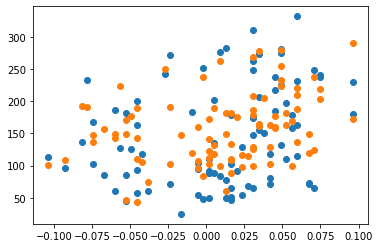

In [37]:
plt.scatter(df_X_test[:, 0], df_y_test)
plt.scatter(df_X_test[:, 0], prediction)
plt.show()

x축에는 X데이터의 첫 번째 칼럼인 age를 넣었고, y축에는 정답인 target 데이터인 당뇨 수치를 넣어서 scatter로 정답 데이터(파란점)와 예측한 데이터(주황점)를 비교해보았다.  
정답데이터와 예측한 데이터가 묘하게 비슷한 거 같으면서도 다른 거 같다. loss 값의 차이가 커서 그런 것이라는 추측을 해봤다.

## 회고
1. 회귀모델 예측정확도가 MSE 손실함수값 3000이하 달성하기 : 학습률을 0.01로 설정하고 i의 범위는 0~3000, i를 100의 배수로 뽑았을 때 loss 값이 2926.7842이 나왔다. random.rand() 함수를 알아보는 과정에서 W와 b의 값이 바뀌었는데 두 값이 바뀌면 기본 설정은 같아도 loss 값이 바뀐다는 것을 알게 되었다. 
2. 데이터개수 시각화 및 예측결과 시각화 진행하기 : diabetes.data와 diabetes.target의 데이터 구조를 알아보고 pandas를 이용하여 data frame을 만들어보았다. 이 과정에서 age나 sex 등 숫자로 이상하게 표현되어 있는 것을 발견했고, 사이킷런 사이트를 통해 그 이유를 알 수 있었다. 그 이유는 모든 특성을 -0.2~0.2 사이에 분포하도록 조정했기 때문이라고 한다. 그리고 마지막에 정답데이터와 예측 데이터를 scatter로 표현해 비교해보았다. 두 데이터를 비교하는데 이 정도면 비슷하게 나온건지 다르게 나온건지 파악하기 힘들었다. loss 값이 커서 이런 scatter가 나온 거 같은데 다른 scatter들도 많이 보면서 결과가 어떤지 파악하는 능력을 길러야겠다고 다짐했다.
3. random.rand() 함수의 사용법에 대해 정확하게 몰라서 그에 대한 정보를 찾아보고 직접 실험해보았다. 이 함수는 0~1사이의 난수 랜덤으로 구하는 함수인데, ()안에 숫자가 있으면 그 숫자만큼, 숫자가 없으면 1개의 숫자만 나온다. 그리고 숫자가 없으면 array()가 되지 않는다.
4. X[:, i] * W[i]. 이 식이 왜 나온 것인지 다시 한 번 찾아보았다. 이 식은 X의 모든 행의 i-1과 i-1에 해당하는 가중치의 곱을 의미하는데 결국 for문으로 반복하면 X1*W1+X2*W2+...+Xi*Wi라는 식이 나온다.
5. gradient(기울기)구하기를 제대로 이해하기가 어려웠다. 다른 블로그를 참고했음에도 제대로 이해하기는 실패했다. 그래도 지금까지 경험을 봤을 때 반복해서 보다보면 어느순간 이해가 되는 순간이 온다. 그래서 이부분은 계속 반복해서 보기로 다짐했다.
6. 그래프조차도 내가 생각한 거처럼 나오지 않는 것을 보면서 보통 일이 아니라는 생각이 들었다. 원인을 계속 찾아보려 하지만 한계가 계속 느껴졌다.
7. 프로젝트를 진행하면서 느낀점 : 이번 프로젝트 역시 LMS에 대한 의존도가 높았다. 코드부터 가이드라인까지 LMS가 없었다면 완성하기 힘들었을 것이다. LMS를 많이 참고했음에도 불구하고 완성도가 높은 프로젝트라고는 생각하지 않는다. 물론 의존도를 낮추는 것도 중요하지만 완성도 높은 프로젝트를 만들기 위해서는 더욱 노력해야겠다는 생각이 들었다. 이해못한 부분도 많지만 그런 부분일수록 더욱 여러 번 반복해서 봐야겠다.

## reference
[당뇨병 자료 분석](https://yhyun225.tistory.com/11)  
[random.rand()](https://codetorial.net/numpy/random.html)  
[df_X[:, i] * W[i]](https://stackoverflow.com/questions/33491703/meaning-of-x-x-1-in-python)  
[gradient](https://minhobby.tistory.com/10)

-------------------

# 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

## Step 1. 데이터 가져오기

In [47]:
import pandas as pd

train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


터미널에 ~/data/data/bike-sharing-demand경로에 train.csv 데이터를 train 변수로 가져와야 하는데 터미널에 무엇을 입력해야 하는지 몰랐었다.  
로컬컴퓨터 터미널에 mkdir -p ~/data/data/bike-sharing-demand, ln -s ~/data ~/data/data/bike-sharing-demand 이렇게도 입력해보고 mkdir -p ~/data/data/bike-sharing-demand/train.csv, ln -s ~/data ~/data/data/bike-sharing-demand/train.csv 이렇게도 입력해보고 이와 유사하게 몇번을 입력해봤지만 "IsADirectoryError: [Errno 21] Is a directory" 에러가 떴다. 해결방법도 구글링으로 찾아보고 train.csv를 가져오는 방법도 구글링으로 찾아봤지만 해결하지 못했다. 경로설정 자체가 잘못되어서 그런 거 같은데 아무리 해봐도 안된다.  
하지만 클라우드 주피터를 통해 train 변수로 가져오는 것은 성공했다. train.csv는 총 10886개의 행과 12개의 열로 구성되어있었다.  

판다스를 이용해 데이터프레임도 만들어 보았다.  
kaggle에 따르면 다음과 같은 데이터 필드가 있다.  
datetime : 시간별 날짜 + 타임스탬프  
season : 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울  
holiday : 휴일  
workingday : 근무일  
weather : 1 = 맑음, 거의 없음 구름, 약간 흐림, 약간 흐림  
2 = 안개 + 흐림, 안개 + 부서진 구름, 안개 + 약간 구름, 안개  
3 = 약한 눈, 약한 비 + 뇌우 + 산발적 구름, 가벼운 비 + 산발적인 구름  
4 = 폭우 + 얼음 팔레트 + 뇌우 + 안개, 눈 + 안개  
temp : 섭씨 온도  
atemp : 체감 온도(섭씨)  
humidity : 습도  
windspeed : 풍속  
casual : 미등록 사용자 렌탈  
registered : 등록 된 사용자 렌탈  
count : 총 렌탈 횟수  

## Step 2. datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [48]:
# datetime 자료형으로 변환
train['datetime'] = pd.to_datetime(train['datetime'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [49]:
# 연, 월, 일, 시, 분, 초 6가지 컬럼 생성하기
train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour
train['minute']=train['datetime'].dt.minute
train['second']=train['datetime'].dt.second

## Step 3. year, month, day, hour, minute, second 데이터 개수 시각화하기

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='second', ylabel='count'>

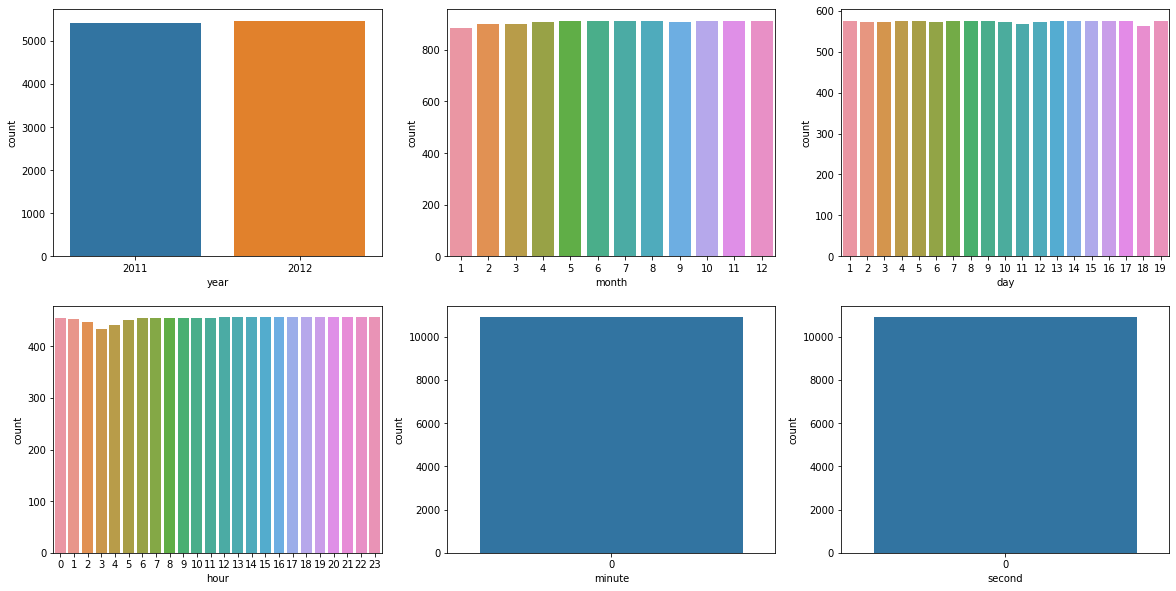

In [51]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20,10)) # ncols는 행의 개수, nrows는 열의 개수, figsize로 그래프 크기 조정 가능
sns.countplot(x="year", data=train, ax=ax[0,0])
sns.countplot(x="month", data=train, ax=ax[0,1])
sns.countplot(x="day", data=train, ax=ax[0,2])
sns.countplot(x="hour", data=train, ax=ax[1,0])
sns.countplot(x="minute", data=train, ax=ax[1,1])
sns.countplot(x="second", data=train, ax=ax[1,2])

minute랑 second는 그래프를 어떻게 해석해야할지 모르겠다.  
day의 경우 1일~19일까지밖에 없어서 내가 잘못한건지 데이터가 누락되어있는건지 몰라서 찾아봤다. 다른 블로그에도 비슷하게 그래프가 나오는 것을 보니 같은 결과가 나와있었다. 데이터가 누락되어 있는 거 같다.

## Step 4. X,y컬럼 선택 및 train/test 데이터 분리

In [52]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [54]:
# X, y 컬럼 선택하기
X = train[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 
           'year', 'month', 'day', 'hour', 'minute', 'second']].values
y = train['count'].values

In [55]:
X.shape

(10886, 14)

In [56]:
y.shape

(10886,)

In [57]:
import numpy as np

np.array(X)

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  1.,  0.,  0.],
       [ 1.,  0.,  0., ...,  2.,  0.,  0.],
       ...,
       [ 4.,  0.,  1., ..., 21.,  0.,  0.],
       [ 4.,  0.,  1., ..., 22.,  0.,  0.],
       [ 4.,  0.,  1., ..., 23.,  0.,  0.]])

In [58]:
np.array(y)

array([ 16,  40,  32, ..., 168, 129,  88])

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
# X와 y 데이터를 각각 train 데이터와 test 데이터로 분리

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8708, 14) (8708,)
(2178, 14) (2178,)


## Step 5. LinearRegression 모델 학습

In [60]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() # 모델 불러오기

In [61]:
model.fit(X_train, y_train) # 모델 학습하기

LinearRegression()

## Step 6. 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [62]:
# 학습된 모델에 X_test를 입력해서 예측값 출력하기
predictions = model.predict(X_test)
predictions

array([294.38363448, 134.80218427,  75.16463673, ..., 113.93698551,
        39.99794292, 224.17284705])

In [63]:
# 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기(mse)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

20442.974145303902

In [64]:
# 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기(rmse)
rmse = mean_squared_error(y_test, predictions)**0.5
rmse

142.9789290255872

mse, rmse 모두 손실함수로 그 수치가 낮을수록 정확도가 높다는 것을 의미한다.  
rmse가 약 143이라는 점을 볼 때 그렇게 정확도가 높은 편은 아닌 거 같다.

## Step 7. x축은 temp 또는 humidity로, y축은 count로 예측결과 시각화하기

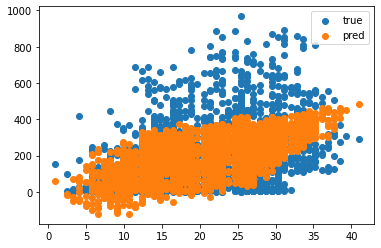

In [66]:
# x축은 temp 데이터를, y 축에는 count 데이터를 넣어서 시각화하기
plt.scatter(X_test[:, 4], y_test, label="true")
plt.scatter(X_test[:, 4], predictions, label="pred")
plt.legend()
plt.show()

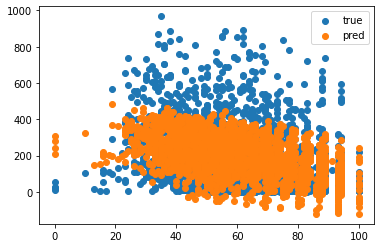

In [67]:
# x축은 humidity 데이터를, y 축에는 count 데이터를 넣어서 시각화하기
plt.scatter(X_test[:, 6], y_test, label="true")
plt.scatter(X_test[:, 6], predictions, label="pred")
plt.legend()
plt.show()

실제와 예측결과가 정말 많이 맞지 않는 거 같다. 시각화 한 것을 보면 예측한 것 보다 실제 대여 횟수가 높은 편이다. 근데 내가 시각화를 잘못한 기분이 든다.  

## 회고
1. 회귀모델 예측정확도가 RMSE 값 150이하 달성하기 : RMSE로 예측정확도를 측정했을 때 142.9 정도가 나왔다. 숫자가 높아 정확도가 높은 편은 아니라고 생각했는데 데이터 자체의 문제로 정확도를 더 높일 수는 없을 거 같다.
2. 데이터개수 시각화 및 예측결과 시각화 진행하기 : 먼저 train.csv를 pandas를 이용하여 data frame을 만들어보았다. 그리고 마지막에 temp와 humidity와 관련해 정답데이터와 예측 데이터를 scatter로 표현해 비교해보았다. 시각화된 것을 해석하는 것에 아직 부족한 실력이지만 이 경우에는 너무 일치하지 않는 게 보였다. 그리고 처음 진행했던 당뇨 수치 예측 데이터는 잘 맞는 편이라고 느껴졌다. 이렇게 일치하지 않는 이유는 loss 값이 너무 크기 때문인 듯 하다.
3. 터미널에 ~/data/data/bike-sharing-demand경로에 train.csv 데이터를 train 변수로 가져와야 하는데 터미널에 무엇을 입력해야 하는지 모르겠다. 여러가지 시도도 해보고 구글링도 해보았지만 찾을 수가 없었다. 나중에라도 꼭 해결해야할 문제이다. 조원들에게도 한번 물어봐야겠다. 그래도 임시방편으로 클라우드 주피터를 사용해서 해결했다.
4. 시각화 된 자료들을 보면서 시각화가 되었는데도 제대로 해석하지 못하는 게 아쉬웠다. 이런 점을 더 채울 수 있도록 노력해야겠다.
5. 프로젝트를 진행하면서 느낀점 : 이번 프로젝트도 LMS를 많이 참고해서 완성할 수 있었다. 그래도 다른 프로젝트와 달라진 점은 모르는 문제가 발생했을 때 구글링을 통해 해결한 문제가 더 많아졌다는 것이다. 물론 내 머릿속에 있는 것으로 완성할 수 있다면 가장 좋겠지만 점점 구글링하는 실력이 늘고 있는 거 같다. 아직 구글링으로 해결하지 못한 문제도 있지만 속도도 빨라지고 필요한 정보를 정확하게 찾는 능력이 더 생긴 기분이다. 

## reference
[자전거 수요 예측하기](https://god9ma.tistory.com/27)  
[to_datetime](https://sarah0518.tistory.com/61)
[countplot](https://wpaud16.tistory.com/31)  
[subplot](https://csshark.tistory.com/56)  
[RMSE](https://growingsaja.tistory.com/233)